In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import runpy

result = runpy.run_path('datasorting_orientation.py')

In [2]:
val_cat = result['val_cat']
data_cat = result['data_cat']
del result

In [3]:
# preprocessing
data_total = []
for a in range(8): # orientation
    temp = np.array(data_cat).T[a]
    t_temp = []
    for data_num in range(np.shape(data_cat)[0]):
        temp2 = np.mean(temp[0],axis=0)
        t_temp.append(temp2)
        
    data_total.append(t_temp)

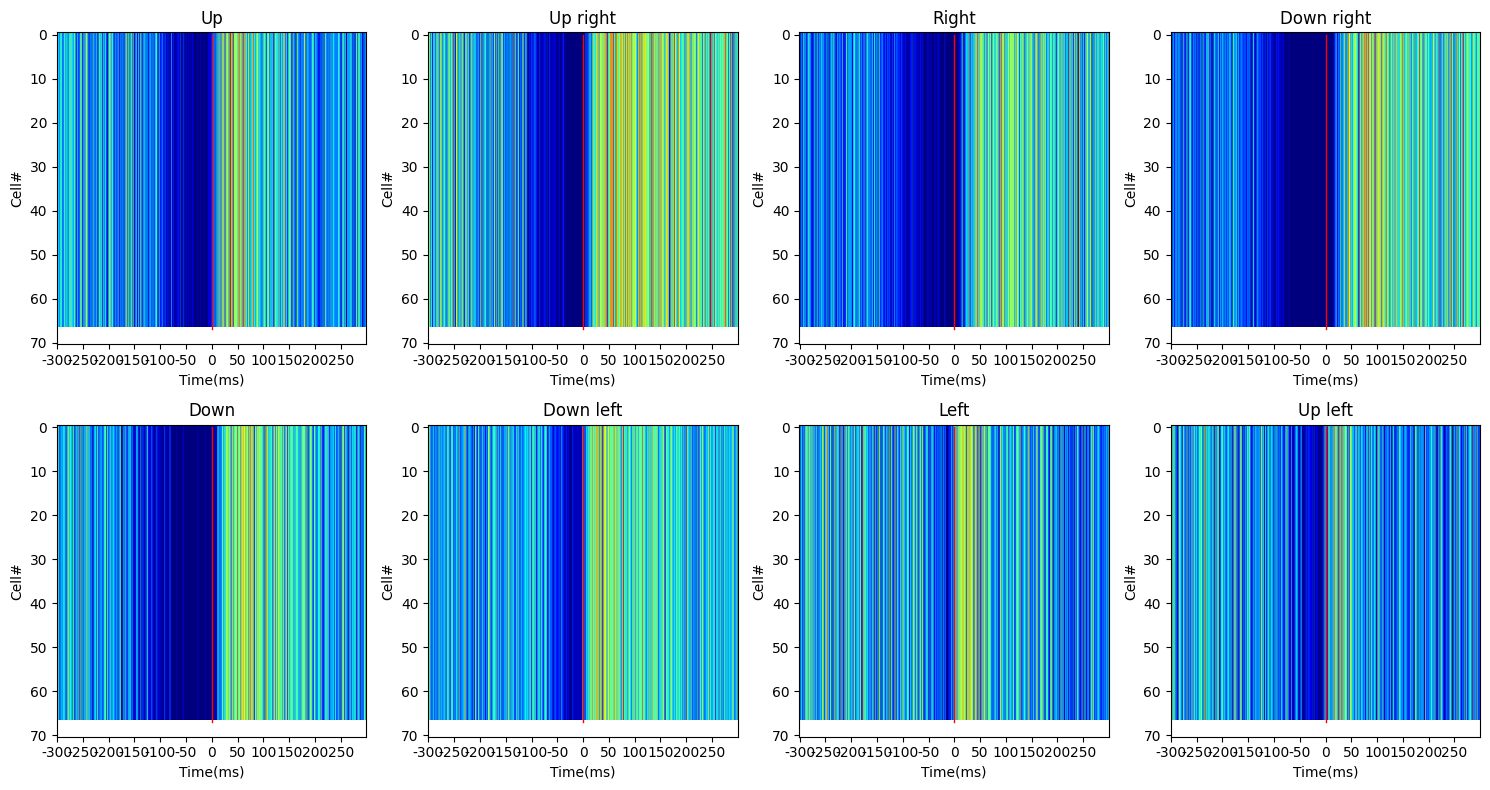

In [4]:
# Plotting raw data of each orientation
label_ori = ['Up', 'Up right', 'Right', 'Down right',
             'Down', 'Down left', 'Left', 'Up left']

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for a in range(8):
    ax = axes[a // 4, a % 4]  # Determine the subplot location
    ax.imshow(data_total[a], aspect='auto', cmap='jet', origin='upper')  # Display the data
    ax.plot([300, 300], [0, len(data_total[0])], 'r', linewidth=1)  # Red vertical line
    ax.set_xticks(np.arange(0, 600, 50))  # Set X ticks
    ax.set_xticklabels(np.arange(-300, 300, 50))  # Set X tick labels
    ax.set_title(label_ori[a])  # Set the title for each subplot
    ax.set_ylabel("Cell#")  # Set Y-axis label
    ax.set_xlabel("Time(ms)")  # Set X-axis label

plt.tight_layout()
plt.show()

In [5]:
# smothing

from filter_matrix import filter_matrix

data_cat_sm = []
for angle in range(8):
    temp_cat = [];
    for n in range(np.shape(data_cat)[0]):
        z = data_cat[n][angle]
        zf = filter_matrix(z,2)
        temp_cat.append(np.mean(zf,axis=0))
        
    data_cat_sm.append(temp_cat)

data_cat_sm = np.array(data_cat_sm)

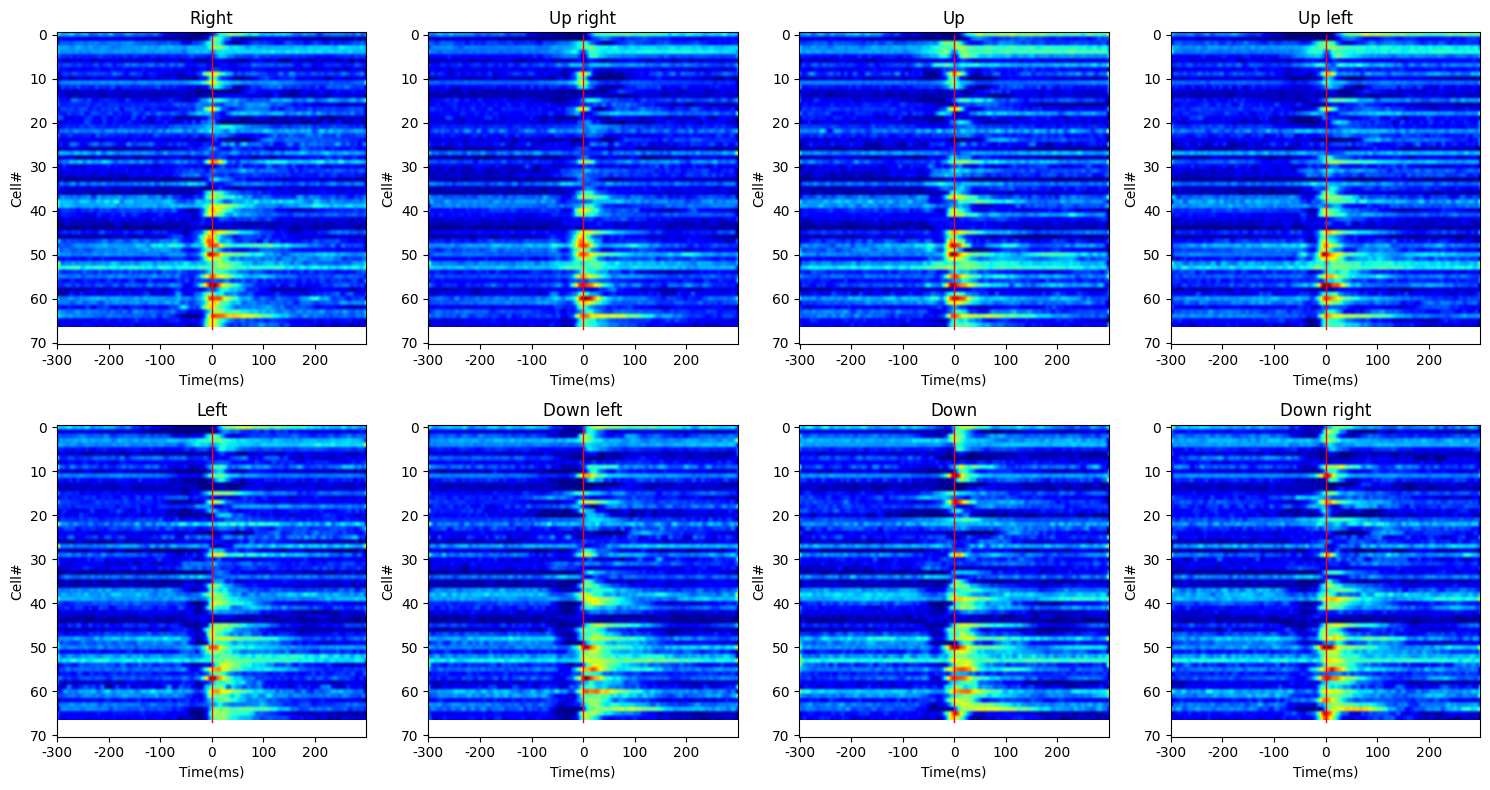

In [6]:
# Plotting raw data of each orientation
label_ori = ['Up', 'Up right', 'Right', 'Down right',
             'Down', 'Down left', 'Left', 'Up left']

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# for a in range(8):
c = 0
for a in [2, 1, 0, 7, 6, 5, 4, 3]: # right to down right, anticlock-wise
    ax = axes[a // 4, a % 4]  # Determine the subplot location
    ax.imshow(data_cat_sm[a], aspect='auto', cmap='jet', origin='upper')  # Display the data
    ax.plot([300, 300], [0, len(data_cat_sm[0])], 'r', linewidth=1)  # Red vertical line
    ax.set_xticks(np.arange(0, 600, 100))  # Set X ticks
    ax.set_xticklabels(np.arange(-300, 300, 100))  # Set X tick labels
    ax.set_title(label_ori[c])  # Set the title for each subplot
    ax.set_ylabel("Cell#")  # Set Y-axis label
    ax.set_xlabel("Time(ms)")  # Set X-axis label
    c = c + 1

plt.tight_layout()

plt.savefig('raw.jpg', dpi=300)
plt.show()

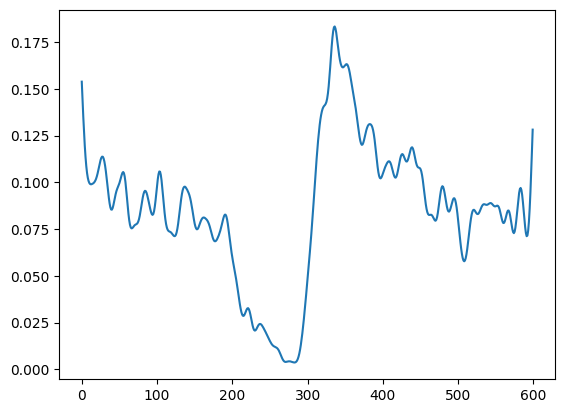

In [7]:
plt.plot(data_cat_sm[0][0])

Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5


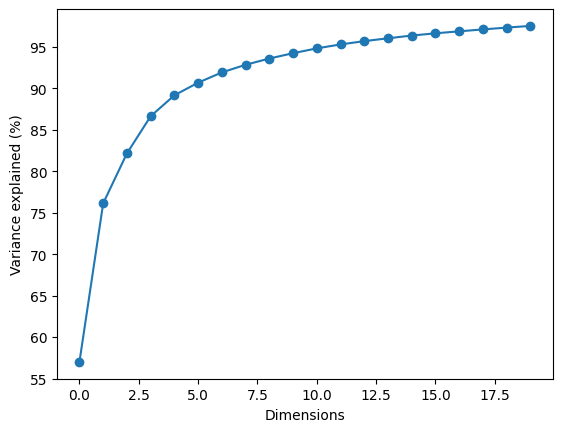

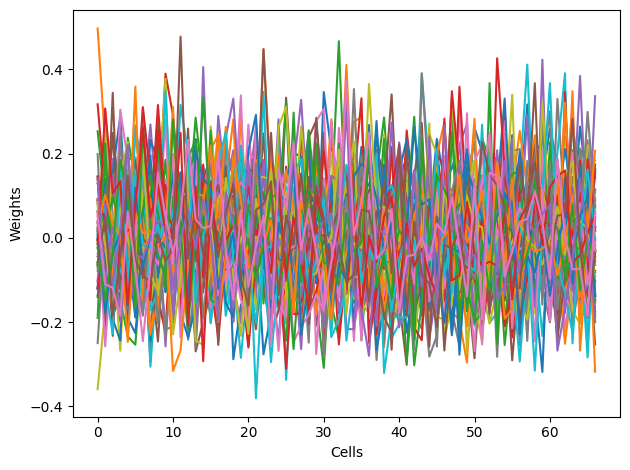

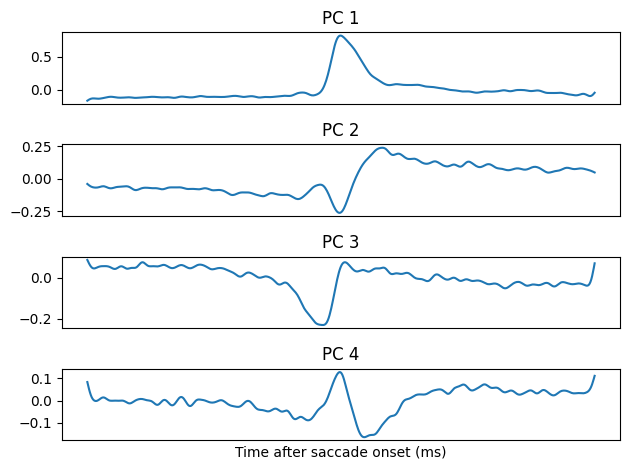

Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4


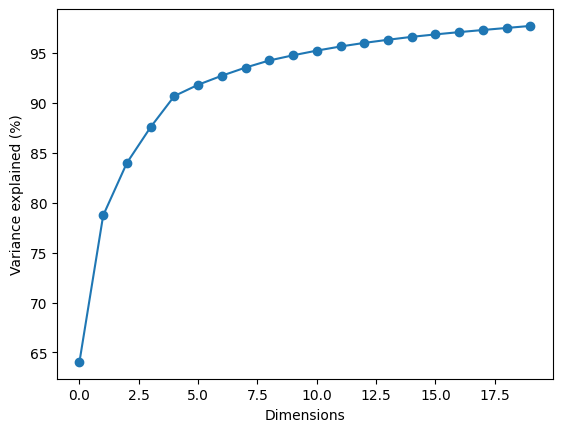

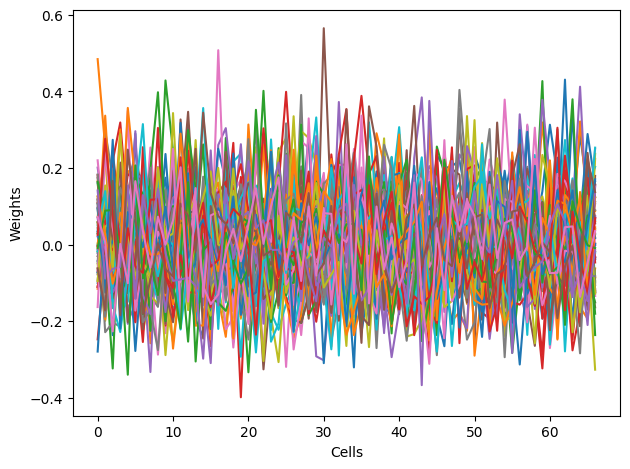

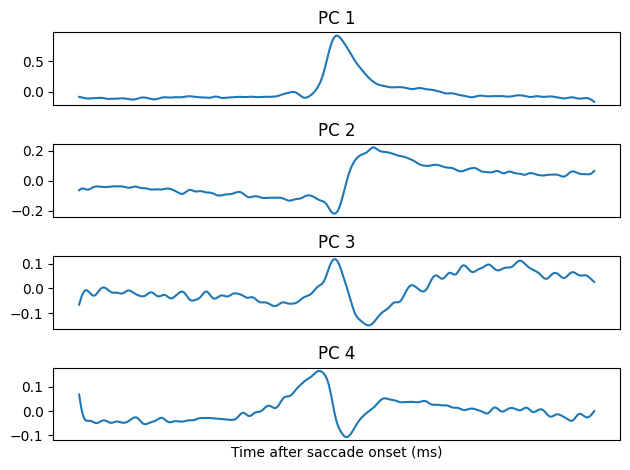

Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5


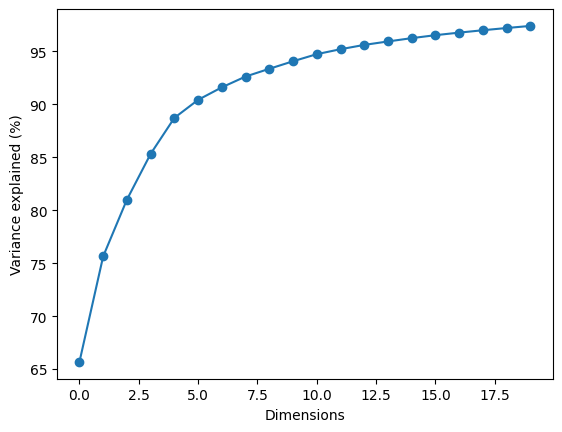

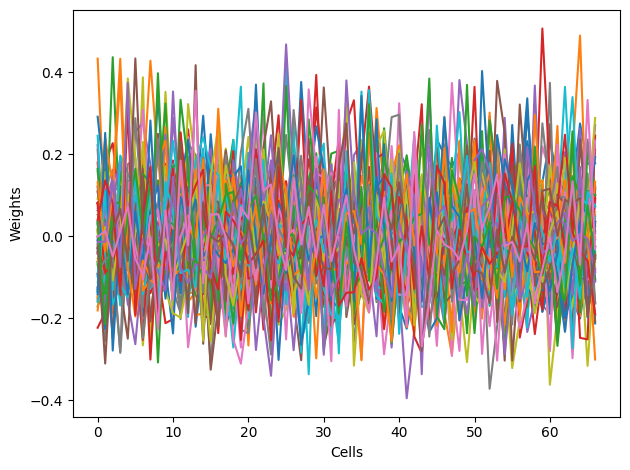

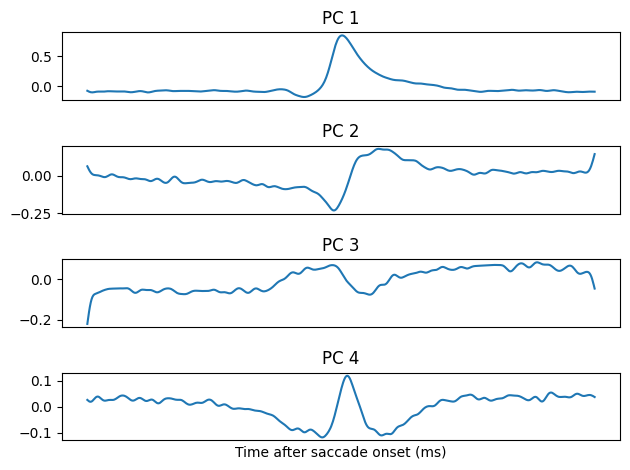

Dimensions: 1, Variance explained: 63.94%
Dimensions: 2, Variance explained: 75.89%
Dimensions: 3, Variance explained: 81.82%
Dimensions: 4, Variance explained: 85.62%
Dimensions: 5, Variance explained: 88.53%
Dimensions to be reduced: 5


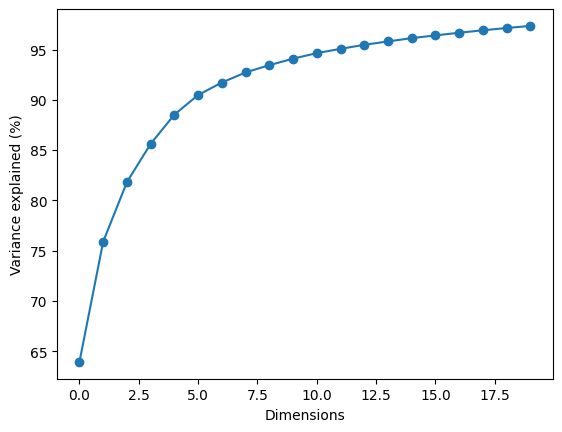

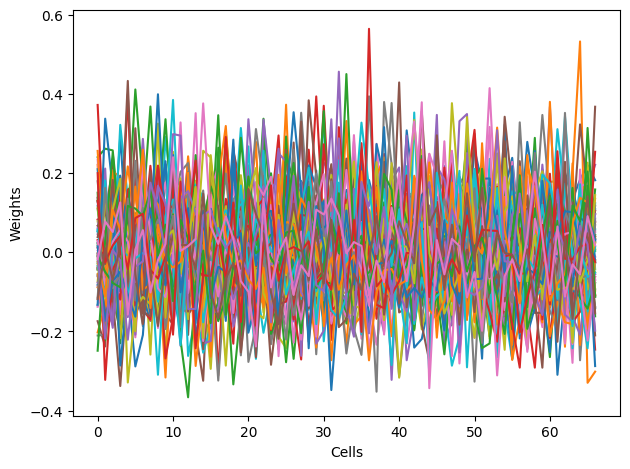

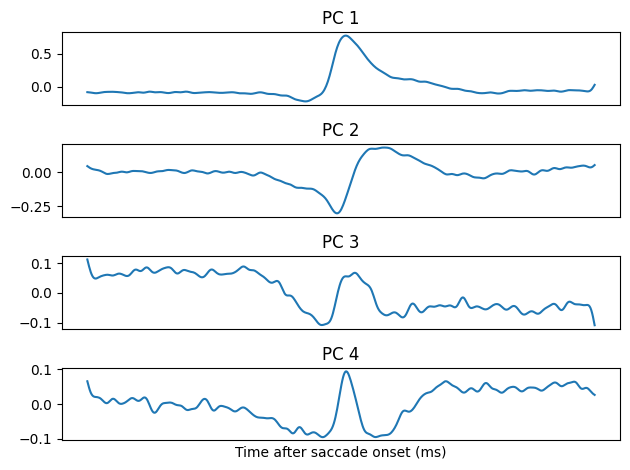

Dimensions: 1, Variance explained: 64.24%
Dimensions: 2, Variance explained: 76.55%
Dimensions: 3, Variance explained: 82.59%
Dimensions: 4, Variance explained: 86.27%
Dimensions: 5, Variance explained: 88.81%
Dimensions to be reduced: 5


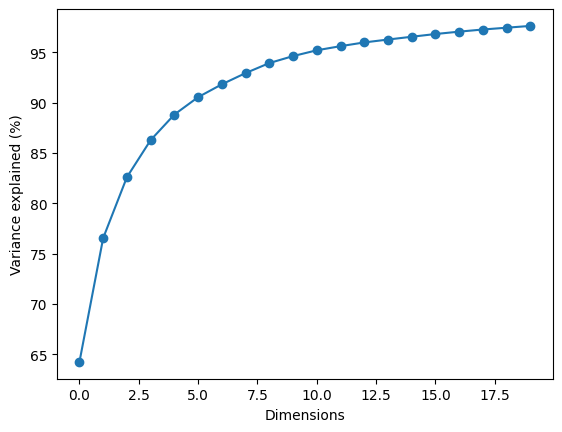

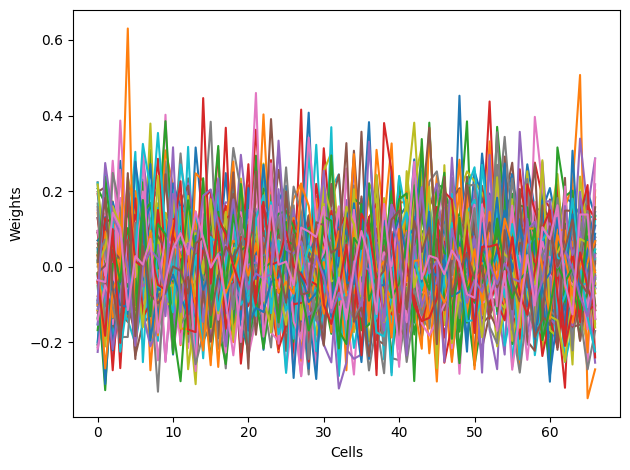

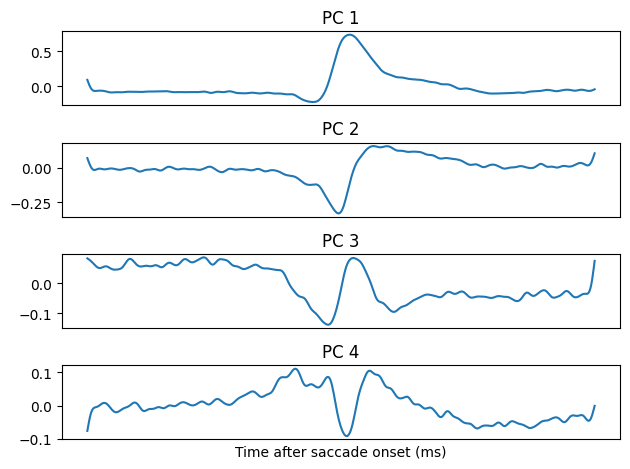

Dimensions: 1, Variance explained: 66.21%
Dimensions: 2, Variance explained: 77.56%
Dimensions: 3, Variance explained: 83.24%
Dimensions: 4, Variance explained: 87.50%
Dimensions: 5, Variance explained: 89.32%
Dimensions to be reduced: 5


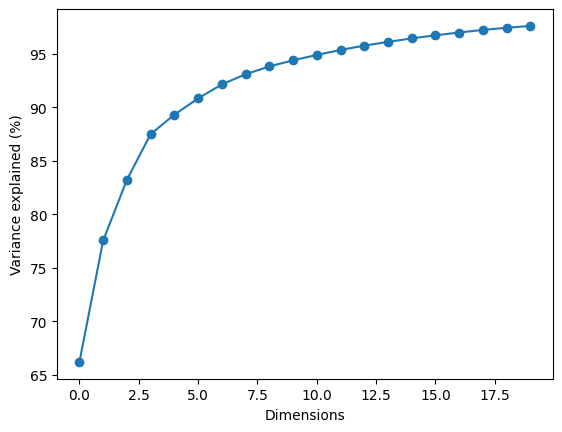

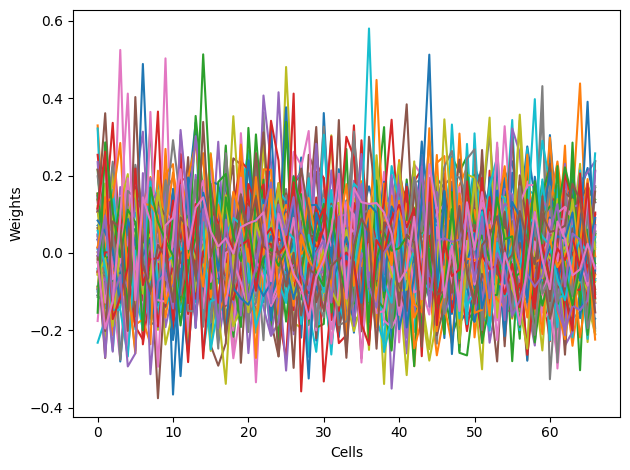

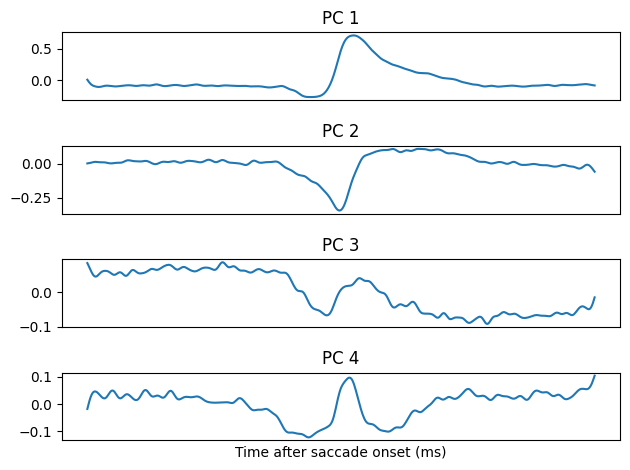

Dimensions: 1, Variance explained: 62.37%
Dimensions: 2, Variance explained: 74.66%
Dimensions: 3, Variance explained: 81.41%
Dimensions: 4, Variance explained: 85.90%
Dimensions: 5, Variance explained: 88.14%
Dimensions to be reduced: 5


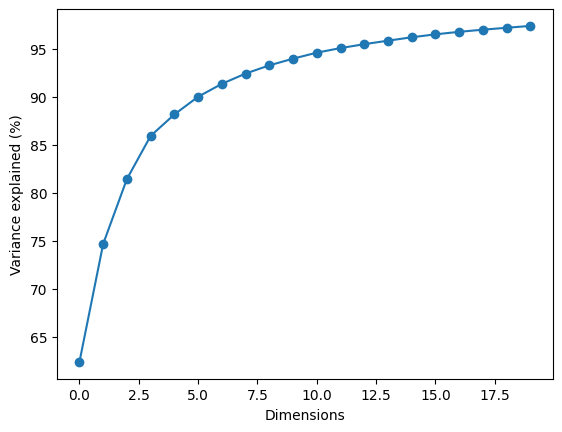

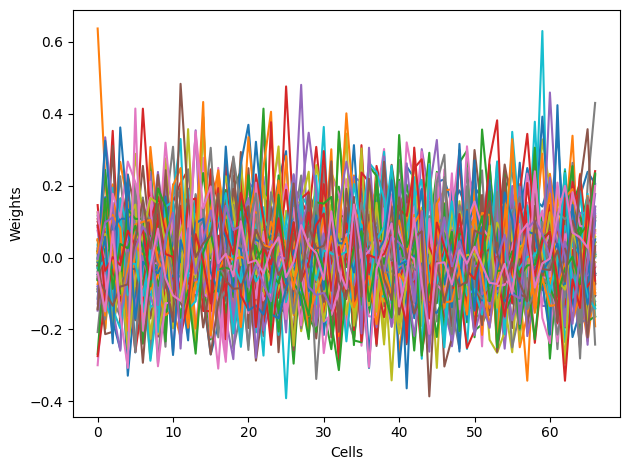

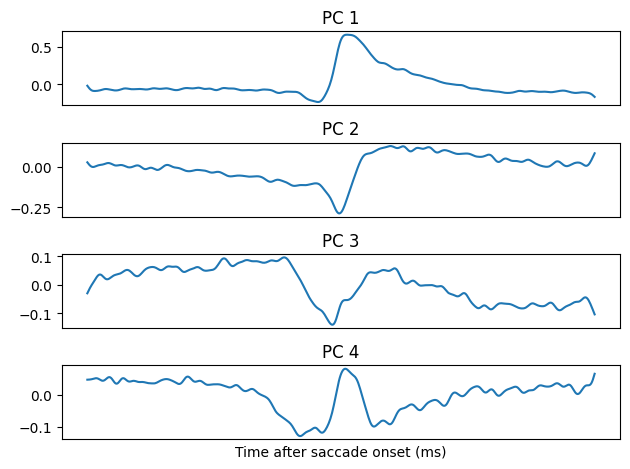

Dimensions: 1, Variance explained: 58.25%
Dimensions: 2, Variance explained: 76.74%
Dimensions: 3, Variance explained: 82.72%
Dimensions: 4, Variance explained: 87.21%
Dimensions: 5, Variance explained: 89.41%
Dimensions to be reduced: 5


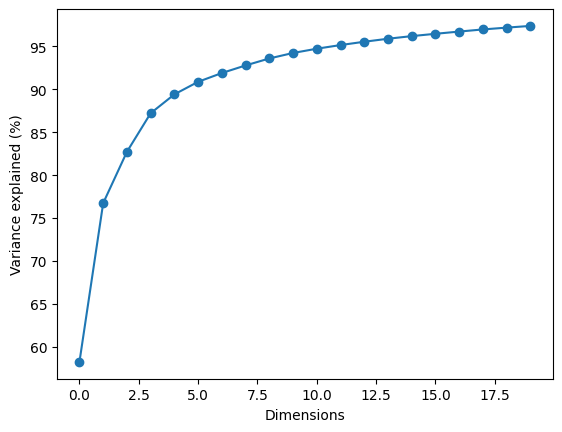

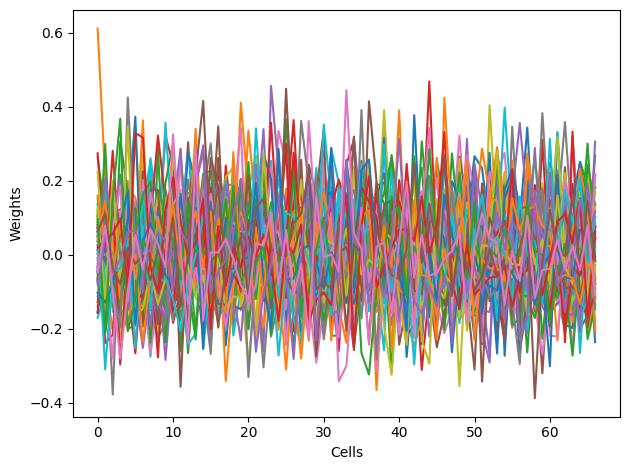

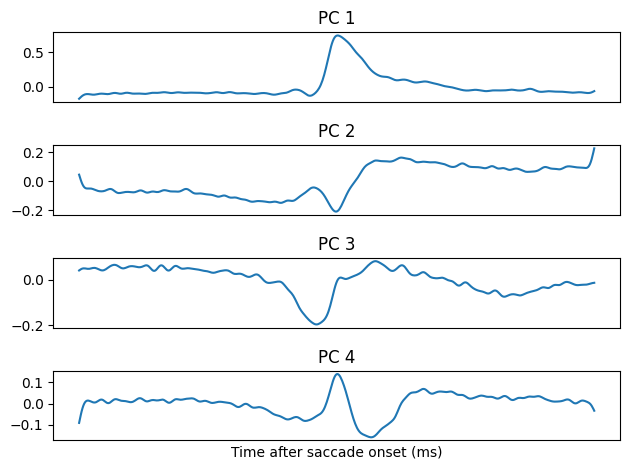

In [8]:
# PCA analysis

from sklearn.decomposition import PCA

PCA_total = {}

# Loop over the orientations (assuming 8 orientations)
# for ori in range(8): # up to up left, clock-wise
c = 1
for ori in [2, 1, 0, 7, 6, 5, 4, 3]: # right to down right, anticlock-wise
    temp_data = data_cat_sm[ori].T  # Transpose to match the MATLAB orientation
    pca = PCA()
    pca.fit(temp_data)  # Perform PCA
    v = pca.components_   # coeff
    p = pca.transform(temp_data).T  # scores
    dd = pca.explained_variance_ratio_   # explained variance

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100
    
    # Print the variance explained for the first 5 components
    for i in range(5):
        print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

    # Find the dimension to reduce to based on cumulative variance explained
    nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
    print(f'Dimensions to be reduced: {nmode}')
    
    # Plot variance explained
    plt.figure()
    plt.plot(var_explained[:20], 'o-', label="Cumulative variance explained")
    plt.xlabel('Dimensions')
    plt.ylabel('Variance explained (%)')
    # plt.title(f'Variance Explained - Orientation {ori + 1}')
    
    plt.savefig(f'ex {c}.jpg', dpi=300)
    plt.show()
    
    # Plot the principal component weights (the eigenvectors)
    plt.figure()
    plt.plot(v.T)  # The components are in rows, so transpose for plotting
    plt.xlabel('Cells')
    plt.ylabel('Weights')
    # plt.title(f'Principal Component Weights - Orientation {ori + 1}')
    plt.tight_layout()
    
    plt.savefig(f'weights {c}.jpg', dpi=300)
    plt.show()

    # Plot the principal component time series (scores)
    plt.figure()
    # hx = []
    for i in range(min(nmode, 4)):  # Plot the first 4 components or up to nmode
        ax = plt.subplot(4, 1, i + 1)
        # hx.append(ax)
        ax.plot(np.arange(-300, 300), p[i, :600])  # Assuming 600 time steps
        ax.set_title(f'PC {i + 1}')
        ax.axis('tight')
        ax.get_xaxis().set_ticks([])
    plt.xlabel('Time after saccade onset (ms)')
    plt.tight_layout()
    
    plt.savefig(f'pc {c}.jpg', dpi=300)
    plt.show()

    # Store PCA results for each orientation
    PCA_total[ori] = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_}
    
    c = c + 1

Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 63.94%
Dimensions: 2, Variance explained: 75.89%
Dimensions: 3, Variance explained: 81.82%
Dimensions: 4, Variance explained: 85.62%
Dimensions: 5, Variance explained: 88.53%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.24%
Dimens

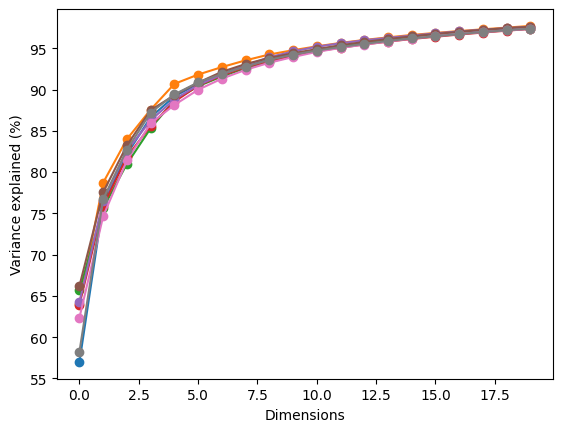

In [12]:
# for make figure

from sklearn.decomposition import PCA

PCA_total = {}

# Loop over the orientations (assuming 8 orientations)
# for ori in range(8): # up to up left, clock-wise
c = 1
for ori in [2, 1, 0, 7, 6, 5, 4, 3]: # right to down right, anticlock-wise
    temp_data = data_cat_sm[ori].T  # Transpose to match the MATLAB orientation
    pca = PCA()
    pca.fit(temp_data)  # Perform PCA
    v = pca.components_   # coeff
    p = pca.transform(temp_data).T  # scores
    dd = pca.explained_variance_ratio_   # explained variance

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100
    
    # Print the variance explained for the first 5 components
    for i in range(5):
        print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

    # Find the dimension to reduce to based on cumulative variance explained
    nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
    print(f'Dimensions to be reduced: {nmode}')
    
    # Plot variance explained
    # plt.figure()
    plt.plot(var_explained[:20], 'o-', label="Cumulative variance explained")
    plt.xlabel('Dimensions')
    plt.ylabel('Variance explained (%)')
    # plt.title(f'Variance Explained - Orientation {ori + 1}')
    
plt.savefig('ex_total.jpg', dpi=300)
    # plt.show()
    
   

In [ ]:
# Plotting

from scipy.ndimage import gaussian_filter1d

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

color = []
for a in range(8):
    t_color = [1, 0+1/9*a, 0+1/9*a]
    color.append(t_color)
    
color = np.array(color).reshape(8,3)


plt.figure()
for ori in range(8):
    
   
    temp_PC = PCA_total[ori]['p'].T
    
    s_temp1 = gaussian_filter1d(temp_PC[0], win)
    s_temp2 = gaussian_filter1d(temp_PC[1], win)
    s_temp3 = gaussian_filter1d(temp_PC[2], win)

    X = s_temp1[0:600]
    Y = s_temp2[0:600]
    Z = s_temp3[0:600]

    plt.scatter(X, Y, s=10, color=color[ori], marker='o')
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    # zlabel('PC3')
    
plt.show()

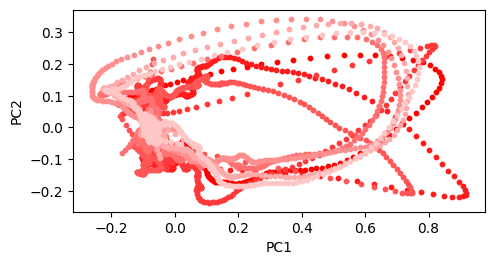

In [58]:
# Plotting each

win = 1 # timewindow (ms), if sampling rate is 1000hz, win=10 is 10ms

color = []
for a in range(8):
    t_color = [1, 0+1/9*a, 0+1/9*a]
    color.append(t_color)
    
color = np.array(color).reshape(8,3)


plt.figure(figsize = (50, 50))
for ori in range(8):

    temp_PC = PCA_total[ori]['p'].T
    
    s_temp1 = gaussian_filter1d(temp_PC[0], win)
    s_temp2 = gaussian_filter1d(temp_PC[1], win)
    s_temp3 = gaussian_filter1d(temp_PC[2], win)

    X = s_temp1[0:600]
    Y = s_temp2[0:600]
    Z = s_temp3[0:600]
    
    ax = plt.subplot(1, 8, i + 1)
    ax.scatter(X, Y, s=10, color=color[ori], marker='o')
    ax.set_aspect('equal')
        
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
# plt.tight_layout()
plt.show()

In [ ]:
plt.figure()
# hx = []
for i in range(min(nmode, 4)):  # Plot the first 4 components or up to nmode
    ax = plt.subplot(4, 1, i + 1)
    # hx.append(ax)
    ax.plot(np.arange(-300, 300), p[i, :600])  # Assuming 600 time steps
    ax.set_title(f'PC {i + 1}')
    ax.axis('tight')
    ax.get_xaxis().set_ticks([])
plt.xlabel('Time after saccade onset (ms)')
plt.tight_layout()
plt.show()



figure
num=1:4:32;
for ori=1:8;
    
    temp_PC=PCA_total{ori,2};
    
    s_temp1=smoothdata(temp_PC(:,1),'gaussian',win);
    s_temp2=smoothdata(temp_PC(:,2),'gaussian',win);
    s_temp3=smoothdata(temp_PC(:,3),'gaussian',win);
    s_temp4=smoothdata(temp_PC(:,4),'gaussian',win);
    
    X=s_temp1(1:600); Y=s_temp2(1:600); Z=s_temp3(1:600); Z2=s_temp4(1:600);
    
    subplot(8,4,num(ori))
    plot(-300:300-1,X)    
    xlabel('Time(ms)')
    ylabel('PC1')
    
    subplot(8,4,num(ori)+1)
    plot(-300:300-1,Y)
    xlabel('Time(ms)')
    ylabel('PC2')

    subplot(8,4,num(ori)+2)
    plot(-300:300-1,Z)
    xlabel('Time(ms)')
    ylabel('PC3')
    set(gca, 'YDir','reverse')

    subplot(8,4,num(ori)+3)
    plot(-300:300-1,Z2)
    xlabel('Time(ms)')
    ylabel('PC4')
    
    %     axis square
    
end; clear ori



%% explained

final=[];

for a=1:8;
    
    temp=PCA_total{a,3};
    final=[final temp];
end


%% dummy

%
% f_c=[];
% for t=1:size(temp_data,2);
%
% [coeff,score,latent,tsquared,explained,mu]=pca(temp_data(:,t));
% f_c=[f_c, coeff];
% end
%
% Xcentered = score*coeff'
% biplot(coeff(:,1:2),'scores',score(:,1:2))
%
% X=coeff(:,1); Y=coeff(:,2); Z=coeff(:,3);
% X=score(1,:); Y=score(2,:); Z=score(3,:);
% scatter(X,Y)
%
%
% %%
%
% data_num=1;
%
% temp_data=data_total{data_num};
%
% for a=1:size(temp_data,2);
%
%     [coeff,score,latent,tsquared,explained,mu]=pca(temp_data(:,:)');